<a href="https://colab.research.google.com/github/dude123studios/AdvancedDeepLearning/blob/main/Using_pretrained_VGG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16

model = VGG16()
model.summary()

553467904/553467096 [==============================] - 4s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
____________________________________________________________

In [2]:
import cv2 
import numpy as np
im = cv2.resize(cv2.imread('Cute-Cats-063.jpg'),(224,224))
im = np.expand_dims(im,axis=0)
im.astype('float32')


array([[[[ 50.,  58.,  27.],
         [ 48.,  56.,  26.],
         [ 50.,  58.,  28.],
         ...,
         [ 21.,  76.,  49.],
         [ 29.,  78.,  48.],
         [ 40.,  90.,  53.]],

        [[ 51.,  59.,  28.],
         [ 48.,  56.,  25.],
         [ 49.,  57.,  27.],
         ...,
         [ 26.,  82.,  53.],
         [ 27.,  84.,  51.],
         [ 38.,  96.,  57.]],

        [[ 49.,  58.,  27.],
         [ 50.,  58.,  28.],
         [ 50.,  58.,  28.],
         ...,
         [ 32.,  91.,  60.],
         [ 31.,  93.,  57.],
         [ 37., 102.,  60.]],

        ...,

        [[ 21.,  48.,  39.],
         [ 16.,  45.,  36.],
         [ 15.,  46.,  37.],
         ...,
         [185., 200., 209.],
         [130., 147., 156.],
         [176., 193., 202.]],

        [[ 16.,  48.,  37.],
         [ 16.,  52.,  40.],
         [ 18.,  53.,  43.],
         ...,
         [189., 204., 213.],
         [171., 188., 197.],
         [170., 187., 196.]],

        [[ 26.,  62.,  48.],
       

278


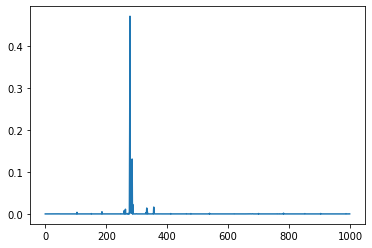

In [8]:
output = model.predict(im)
index = np.argmax(output)
print(index)

import matplotlib.pyplot as plt
plt.plot(output.ravel())
plt.show()

In [10]:
new_model = tf.keras.models.Model(inputs=model.input,outputs=model.get_layer('block4_pool').output)
output = new_model.predict(im)
print(output)

[[[[0.0000000e+00 0.0000000e+00 1.4204256e+02 ... 5.4646683e+01
    0.0000000e+00 0.0000000e+00]
   [0.0000000e+00 0.0000000e+00 4.1048538e+01 ... 0.0000000e+00
    0.0000000e+00 0.0000000e+00]
   [0.0000000e+00 0.0000000e+00 1.0836384e+02 ... 0.0000000e+00
    0.0000000e+00 0.0000000e+00]
   ...
   [9.5386902e+01 0.0000000e+00 4.0447208e+02 ... 3.4181198e+02
    8.7121338e+01 0.0000000e+00]
   [2.1837285e+02 0.0000000e+00 4.1124875e+02 ... 0.0000000e+00
    0.0000000e+00 0.0000000e+00]
   [1.8263818e+02 0.0000000e+00 3.0659402e+02 ... 0.0000000e+00
    0.0000000e+00 0.0000000e+00]]

  [[0.0000000e+00 0.0000000e+00 3.2486214e+01 ... 0.0000000e+00
    0.0000000e+00 0.0000000e+00]
   [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
    9.0426964e+01 0.0000000e+00]
   [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
    0.0000000e+00 0.0000000e+00]
   ...
   [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
    2.9116629e+02 0.0000000e+00]
   [1.7244154e